# AstroLogics Tutorial, Boolean Network Analysis and Clustering : Bonesis Tutorial

This tutorial demonstrates the AstroLogics framework for analyzing and comparing Boolean network model ensembles. AstroLogics is designed for benchmarking Boolean models through three major evaluation criteria: network evaluation, logical function evaluation, and dynamic evaluation.

## Overview of AstroLogics Framework

AstroLogics addresses a critical gap in Boolean network modeling: while multiple methods exist for Boolean model synthesis (like Bonesis, BN-sketch), there hasn't been a standardized way to evaluate and compare generated model ensembles. The framework focuses on:

- **Dynamic properties**: Examining state transition graphs and model behaviors through simulation
- **Logical function evaluation**: Analyzing and comparing logical rules that govern node behaviors
- **Model clustering**: Identifying groups of models with similar dynamics and logical features

## Required Libraries

In [1]:
import pandas as pd 
import os
import astrologics as ast
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset: CNS Differentiation Model

We'll use the Central Nervous System (CNS) differentiation model from Qiu et al., 2017, which serves as the tutorial network for Bonesis. This model contains 12 nodes with moderate connectivity and demonstrates key concepts of cellular decision-making processes.

For more details on the Bonesis network and inferences, please checkout this [link](https://bnediction.github.io/bonesis/tutorials/tour.html)

## Step 1: Load Model Ensemble

In [2]:
# Load the model path and create AstroLogics object
model_path = 'models/test_bonesis/'
model = ast.ensemble(model_path, project_name = 'test_bonesis')
model.create_simulation()

Simulation object created


The `ensemble` object is the core component of AstroLogics that handles:

- Loading multiple Boolean network models from a directory
- Managing simulation parameters and configurations
- Coordinating analysis across the model ensemble

## Step 2: Simulate the model ensemble

In this part of the script we first simulate all the BN within the model ensemble. We utilize the MaBoSS engine as the main simulator.

This creates an initial state where all nodes have equal probability (0.5) of being active. This represents a neutral starting condition that allows the system to evolve according to its inherent dynamics.

We then start the simulation using MaBoSS.

**MaBoSS** (Markovian Boolean Stochastic Simulator) is crucial for the AstroLogics approach because:

- It converts Boolean network dynamics into continuous-time Markov processes
- Provides probabilistic approximation of complex state transition graphs
- Enables analysis of both transient and steady-state behaviors
- Scales computationally better than exhaustive state space exploration

In [3]:
# Configure simulation parameters
model.simulation.update_parameters(max_time = 15, sample_count = 1000)
model.simulation.run_simulation()

Start simulation


  0%|          | 0/88 [00:00<?, ?it/s]

Simulation completed


## Step 3 (Optional) : Trajectory visualization

In this steps the simulation trajectories of BNs in the model ensemble can be visualized using PCA. The method allows for a global view of the dynamics of all the models within the model ensembles perform, and may give insight to how the model can potentially be clustered.

Trajectory object created


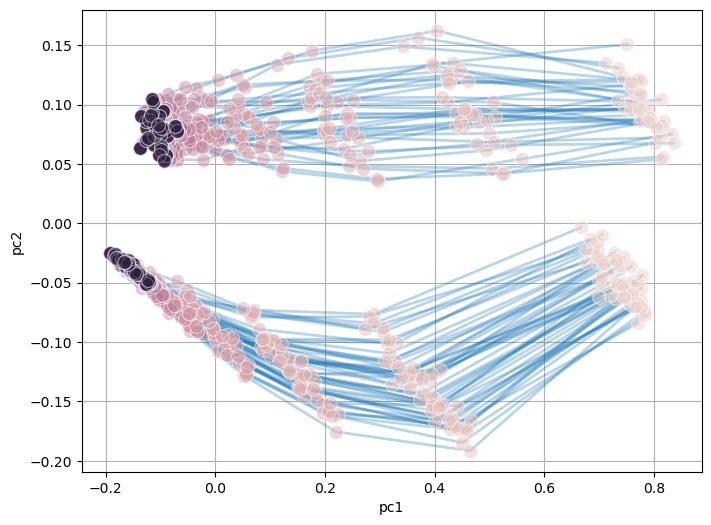

In [4]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_pca_trajectory(color = 'timepoint')

## Step 4: Calculate Distance Matrix

This step is fundamental to the AstroLogics methodology:

- **Distance calculation**: Compares models based on their endpoint activation probabilities
- **Euclidean distance**: Measures similarity in the final state distributions
- **Model comparison**: Enables identification of models with similar dynamics

In this function `calculate_distancematrix`, users can select the two options of data used to calculate the distance.

- `endpoint` : The endpoint utilize the node activation probability at the endpoint of MaBoSS simulation. User could also defines the `timepoint` to define a specific timepoint they want to use to define the distance
- `trajectory` : This options utilize the whole MaBoSS simulation trajectory and the `dtw` method to calculate the distances between models.

In [5]:
model.trajectory.calculate_distancematrix(mode = 'endpoint')

Calculating distance matrix for endpoint simulation...
Distance matrix calculated successfully.


In [6]:
model.trajectory.distance_matrix

model_id,bn87,bn66,bn83,bn77,bn36,bn49,bn28,bn38,bn45,bn86,bn24,bn74,bn7,bn13,bn48,bn37,bn57,bn75,bn34,bn40,bn85,bn73,bn31,bn35,bn82,bn1,bn46,bn6,bn29,bn4,bn61,bn16,bn11,bn47,bn44,bn10,bn33,bn14,bn71,bn5,bn56,bn42,bn79,bn60,bn22,bn64,bn39,bn27,bn51,bn15,bn84,bn20,bn53,bn69,bn70,bn2,bn62,bn55,bn67,bn9,bn21,bn54,bn17,bn76,bn43,bn59,bn72,bn30,bn18,bn68,bn23,bn81,bn78,bn0,bn58,bn65,bn52,bn26,bn12,bn80,bn50,bn3,bn19,bn41,bn63,bn32,bn25,bn8
model_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bn87,0.000000,0.025219,0.133662,0.144934,0.134544,0.133019,0.022825,0.142524,0.051400,0.031639,0.038328,0.048703,0.015362,0.131301,0.033347,0.059641,0.132380,0.139431,0.136752,0.136715,0.042485,0.141499,0.142983,0.139018,0.040608,0.141446,0.143771,0.143196,0.149937,0.135963,0.135056,0.017804,0.047833,0.132130,0.136092,0.044317,0.136455,0.025612,0.141372,0.147719,0.138842,0.136697,0.047833,0.070795,0.033660,0.054378,0.135910,0.038330,0.138268,0.137935,0.043463,0.033045,0.025259,0.133345,0.135908,0.077846,0.139165,0.136543,0.138326,0.134933,0.050229,0.137539,0.136444,0.046433,0.135241,0.131871,0.018466,0.134889,0.145152,0.014457,0.142527,0.075472,0.132053,0.145774,0.140688,0.056391,0.028914,0.137237,0.148246,0.028566,0.139061,0.060266,0.078192,0.136942,0.137018,0.139460,0.141411,0.061579
bn66,0.025219,0.000000,0.122082,0.133739,0.122711,0.121548,0.031353,0.125447,0.060266,0.032939,0.014457,0.045913,0.019494,0.122180,0.019647,0.041629,0.125094,0.126653,0.128565,0.125320,0.059641,0.125936,0.126673,0.131552,0.018303,0.126115,0.134261,0.134822,0.146741,0.124403,0.130499,0.022825,0.040792,0.125026,0.123738,0.021817,0.128148,0.027203,0.125308,0.131716,0.125877,0.130836,0.031305,0.052154,0.020905,0.031448,0.123864,0.045754,0.125905,0.128515,0.051798,0.045431,0.042497,0.126020,0.122446,0.067439,0.123584,0.131932,0.124475,0.122201,0.041821,0.132631,0.131875,0.064031,0.122605,0.125020,0.014036,0.126099,0.134317,0.033926,0.131590,0.056569,0.121663,0.128499,0.130373,0.037148,0.034409,0.135337,0.149107,0.024372,0.130100,0.046690,0.060795,0.125008,0.124282,0.125861,0.127409,0.077846
bn83,0.133662,0.122082,0.000000,0.069296,0.029507,0.023386,0.133232,0.036872,0.154424,0.134187,0.118071,0.130394,0.129597,0.022523,0.127764,0.110993,0.040605,0.027616,0.043096,0.038571,0.151519,0.048624,0.032583,0.046760,0.117030,0.046863,0.071205,0.074506,0.077636,0.014475,0.051839,0.131717,0.137980,0.030596,0.012744,0.116439,0.034148,0.134269,0.043512,0.041855,0.029028,0.055338,0.119920,0.131327,0.128766,0.116287,0.038521,0.129828,0.040747,0.045389,0.147161,0.148233,0.139617,0.046575,0.034216,0.149126,0.036090,0.047912,0.026843,0.007287,0.137870,0.051571,0.062757,0.157542,0.024056,0.039641,0.129035,0.043529,0.048013,0.137900,0.053927,0.128475,0.010830,0.052211,0.046232,0.124977,0.139836,0.060635,0.083153,0.133401,0.041295,0.130306,0.134497,0.043560,0.015781,0.050134,0.033653,0.150888
bn77,0.144934,0.133739,0.069296,0.000000,0.040050,0.046648,0.152987,0.068330,0.141421,0.151766,0.126921,0.159881,0.144879,0.055624,0.136125,0.139187,0.046780,0.093622,0.094005,0.080641,0.172734,0.043035,0.075908,0.104805,0.134941,0.036428,0.012649,0.055830,0.133060,0.083666,0.086522,0.146373,0.143715,0.078054,0.080678,0.134796,0.069007,0.146363,0.045695,0.093792,0.090758,0.086833,0.121351,0.124282,0.130878,0.134272,0.066122,0.156703,0.035553,0.092736,0.164891,0.153147,0.160169,0.045706,0.045111,0.138196,0.050626,0.099910,0.058000,0.067845,0.129765,0.101612,0.053339,0.151677,0.048083,0.053254,0.136048,0.034103,0.115261,0.143976,0.100856,0.115473,0.062193,0.048703,0.055036,0.120275,0.147831,0.096229,0.127801,0.136272,0.103228,0.148398,0.119298,0.025865,0.073430,0.034015,0.067179,0.177330
bn36,0.134544,0.122711,0.029507,0.040050,0.000000,0.010000,0.137743,0.040262,0.145341,0.137423,0.117358,0.139277,0.131992,0.021954,0.126657,0.119453,0.027974,0.055182,0.062266,0.051720,0.156987,0.032741,0.042544,0.070342,0.120271,0.025826,0.043313,0.060539,0.100464,0.043863,0

## Step 5: Dimensionality Reduction and Visualization

Multidimensional Scaling (MDS) projects the high-dimensional distance matrix onto a 2D plane, preserving relative distances between models. This visualization reveals:

- **Model clusters**: Groups of models with similar dynamics
- **Outliers**: Models with unique behavioral patterns
- **Gradient patterns**: Continuous transitions between model types

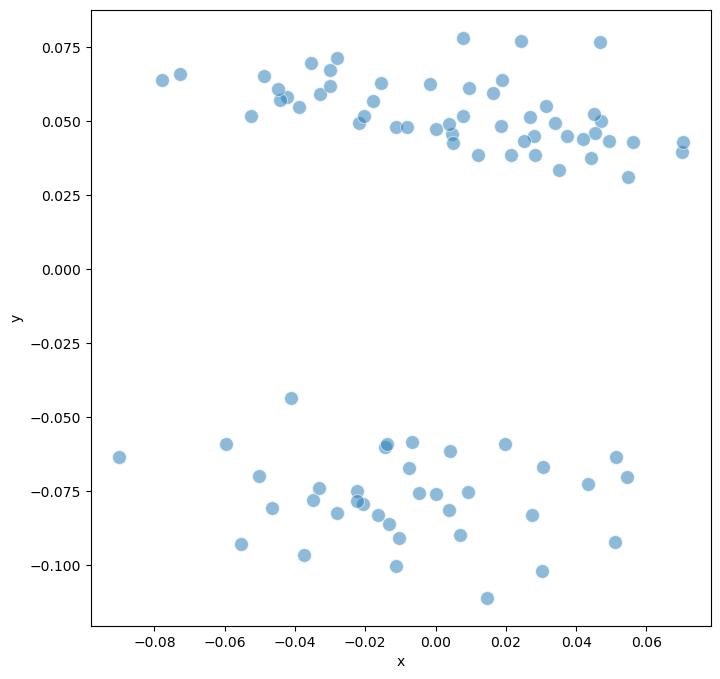

In [7]:
# Perform MDS (Multidimensional Scaling) for visualization
model.trajectory.calculate_MDS()
model.trajectory.plot_MDS(s = 100, fig_size = (8,8))

## Step 6: Model Clustering

Clustering reveals distinct groups within the model ensemble. In the CNS differentiation example, we found 2 major clusters corresponding to different attractor groups, representing distinct cellular fate decisions.

In [8]:
model.trajectory.calculate_kmean_cluster(n_cluster = 2,
                              random_state = 0)

Calculated k-means clustering with 2 clusters.


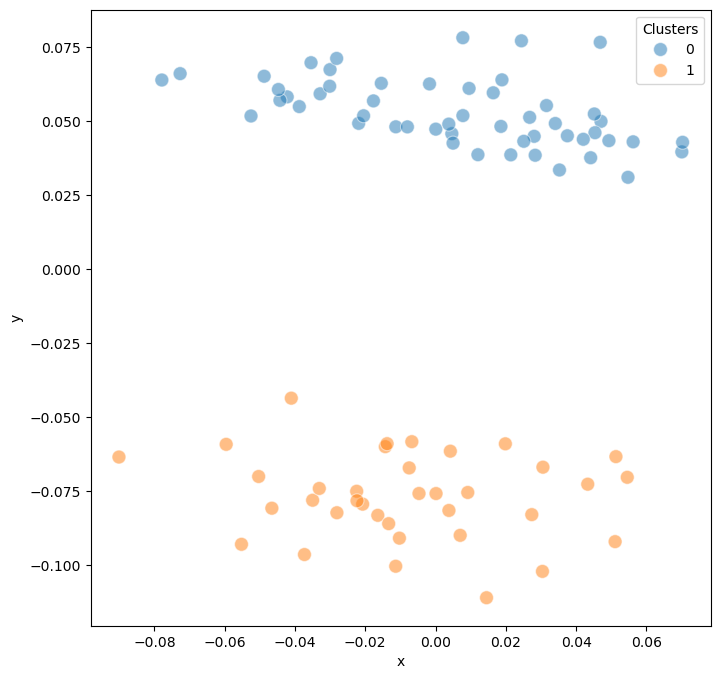

In [9]:
model.trajectory.plot_MDS(s = 100, fig_size = (8,8),plot_cluster = True)

## Step 7 (Optional) : Trajectory Analysis

In this step, we projected the calculated clusters onto the trajectory PCA in the step 3.

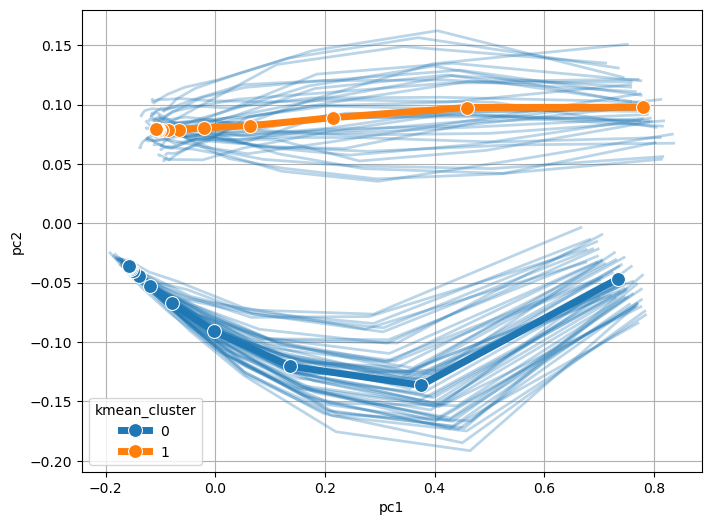

In [10]:
model.trajectory.plot_pca_trajectory(plot_cluster=True)

## Step 8: Logic Function Analysis

This step implements the **logical function evaluation** component of AstroLogics:

- Converts Boolean equations to Disjunctive Normal Form (DNF)
- Creates feature matrices comparing logical rules across models
- Identifies **constant**, **varied**, and **marker** clauses

In [11]:
model.create_logic()
model.logic.model_logic
model.logic.create_flattend_logic_clause()

Loading models logics


  0%|          | 0/88 [00:00<?, ?it/s]

Concatenate results into matrix


  0%|          | 0/88 [00:00<?, ?it/s]

Logic object created
Flatten models logic clauses


  0%|          | 0/88 [00:00<?, ?it/s]

Concatenate results into matrix


  0%|          | 0/88 [00:00<?, ?it/s]

Flattend logic clause created


## Step 9 : Calculate statistic of Logic features (clauses)

In this steps, we have already featurized the logical equations into model logics or clauses. 

We can then integrate the clusters obtained from the trajectory analysis into the `.logic` and perform chi-square statistical test to categorize logic features (clauses) into 3 major groups

- Constatnt : core regulatory features that appears across BNs in the model ensemble
- Varied : Features that may differ between individual BNs but show no statistical significant
- Marker : Key discriminatory features that statistically distinguish between different model clusters.

We can define the p-value of the chi-square test using the function `pval_threshold`.


In [12]:
model.logic.map_model_clusters(model.trajectory.cluster_dict)
model.logic.calculate_logic_statistic(pval_threshold = 0.0001)

Model clusters mapped to logic clauses


The results of the analysis can be visualized in the form of Manhattan Plot shown below.

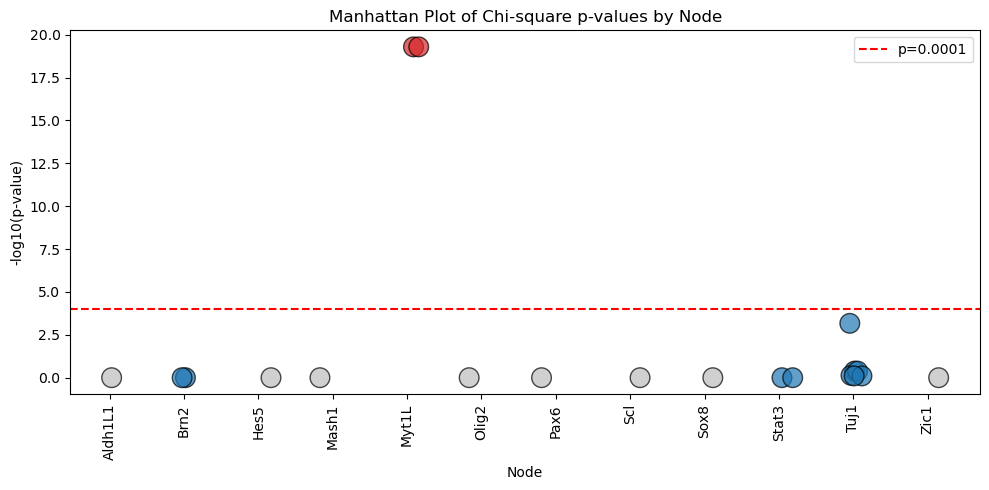

In [13]:

model.logic.plot_manhattan()

Or the results can be summarized into the barplot shown here

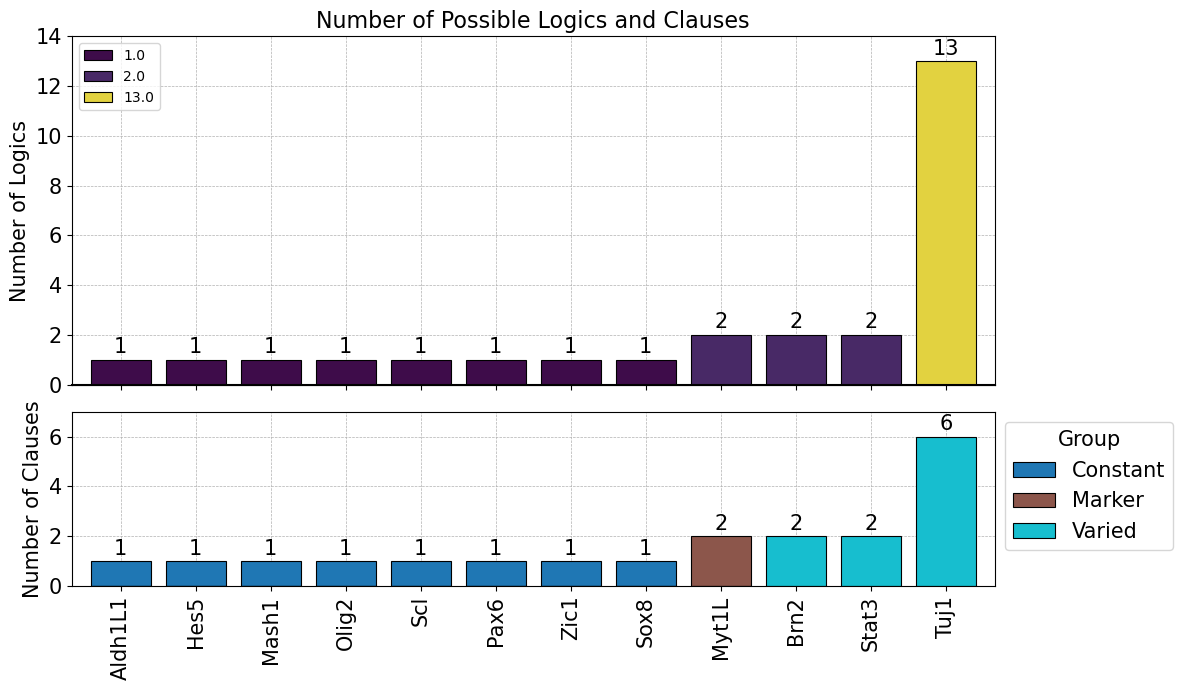

In [14]:
model.logic.plot_logicstat_summary()

## Step 9: Advanced Trajectory Analysis

These visualizations help identify:

- **Most variable nodes**: Components showing greatest differences between models
- **Critical regulators**: Nodes whose activity patterns distinguish model clusters
- **Temporal patterns**: How specific nodes behave over simulation time

In this first plot, we check what are the features that shows the highest variance in their dynamics accross simulation. We calculate the variance of node activation probabily of all BNs in the model ensemble across all timepoints and plotted using the heatmap.

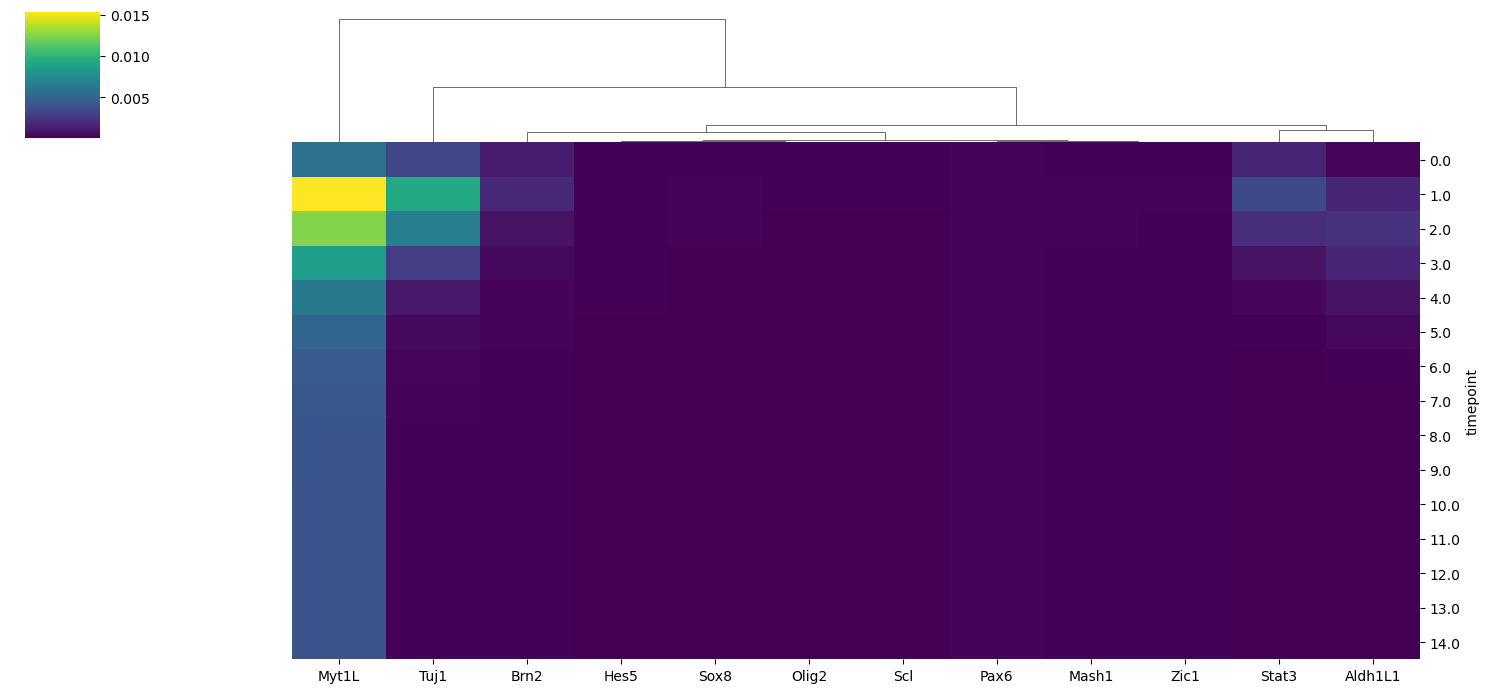

In [15]:
model.trajectory.plot_trajectory_variance()

We identify the key node of interest (Myt1L) which shows the highest variance along the timepoints. Finally, we could visualize the dynamics of this node between two identified clusters using the lineplot.

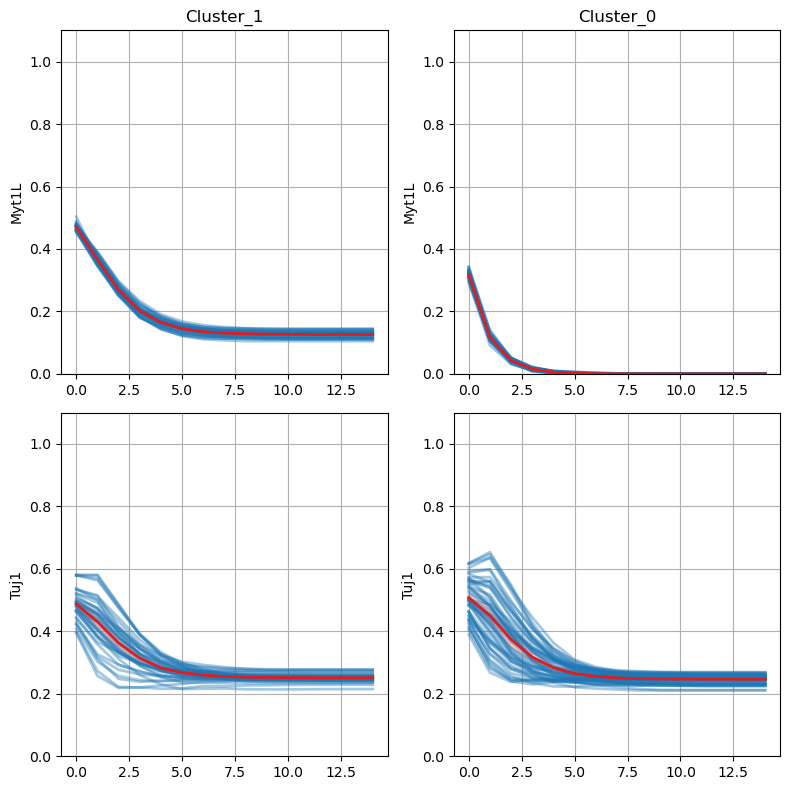

In [16]:
model.trajectory.plot_node_trajectory(node = ['Myt1L', 'Tuj1'])

## Step 10: Logic Feature Heatmap

This analysis typically reveals that **Myt1L** is the key distinguishing node between clusters:

- **Cluster 0**: Myt1L regulated by Olig2
- **Cluster 1**: Myt1L deactivated (value = 0)

<Figure size 800x800 with 0 Axes>

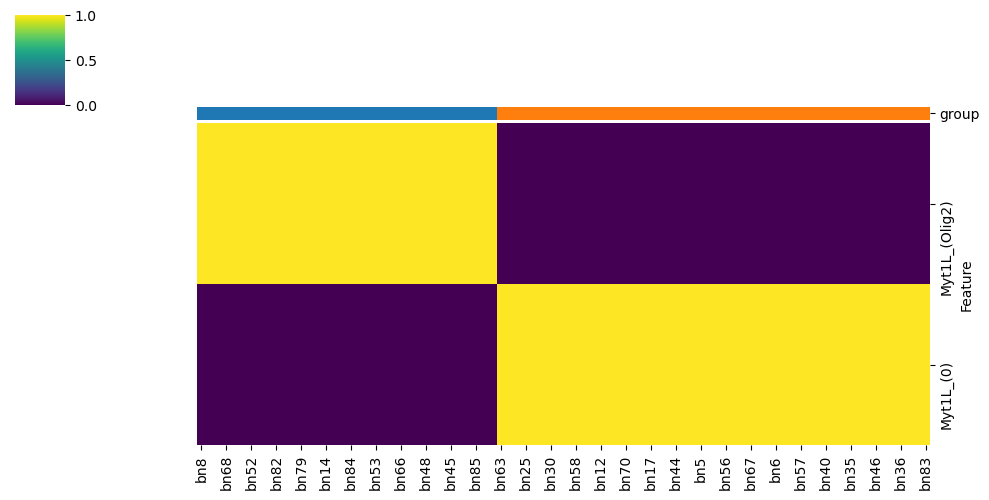

In [17]:
model.logic.plot_node_logic_heatmap(node = ['Myt1L'],
                                     fig_size = (8, 8))

## Key Findings and Biological Interpretation

The AstroLogics analysis of the CNS differentiation model reveals:

### Dynamic Properties

- **Two main clusters** representing different developmental pathways
- **Distinct attractor landscapes** corresponding to different cell fates
- **Conserved transient patterns** showing robust developmental trajectories

### Logical Properties

- **Myt1L as key regulator**: The primary distinguishing factor between clusters
- **Regulatory mechanisms**: Different logical rules governing cell fate decisions
- **Constant vs. variable features**: Core vs. flexible regulatory elements

## Applications and Extensions

### Benchmarking Model Synthesis Methods

AstroLogics can compare models generated by different synthesis tools:

- **Bonesis** vs **BN-sketch** performance
- **Constraint sensitivity** analysis
- **Solution space characterization**

### Complex Network Analysis

For larger networks (like the cancer invasion model with 32 nodes):

- **Computational advantages**: MaBoSS simulation vs. exhaustive attractor calculation
- **Scalability**: Handling thousands of models efficiently
- **Approximation quality**: Balancing accuracy with computational feasibility

### Transient Dynamics Focus

Unlike methods focusing only on attractors, AstroLogics captures:

- **Dynamic Time Warping**: Comparing trajectory shapes and timing
- **Intervention opportunities**: Identifying critical transition points
- **Pathway analysis**: Understanding how systems reach their endpoints

## Conclusion

This tutorial demonstrates how AstroLogics provides a comprehensive framework for Boolean network ensemble analysis. By combining dynamic simulation with logical feature analysis, it offers insights into both the "what" (final states) and "how" (pathways) of cellular decision-making processes.

The framework addresses the critical need for model evaluation and comparison in an era of increasingly sophisticated Boolean network synthesis methods, supporting the transition from single models to ensemble-based understanding of biological systems.